# Coursera IBM DS Final Capstone  
## Author: Babu Konnayil

## Introduction / Business Problem


Major traffic delays or traffic blockages are results of traffic accidents.
The severe the accident, the more time to clear the traffic block.

Can you imagine missing your son or daughter's graduation ceremony or being late to best friend's
wedding or miss your most important business meeting just because traffic block due to accidents?

Wouldn't it be nice to have a tool that can predict whether an accident will happen and its severity
given the weather condition and road condition so that you can plan ahead and be careful to avoid 
accidents?

Our target audiences are vehicle owners in Seattle, Insurance companies, Hospitals and Police /traffic department.  Our Captson project and tool will help to 
predict traffic accidents and its severity given road condition and weather condition so that audiences can take appropriate actions to reduce accidents and allocate resources to better support victims.

## Load all Libraries

In [1]:
# let us import key libraries
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import random

# Import pre-processing
from sklearn import preprocessing 

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import Support Vector Machie
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#Load libraries required for Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

## Data Section - Dataset Preparation and Preprocessing
I will be using data directly obtained from Seattle Department of Traffic (SDOT)for this project as same data from Coursera had only two type of severity code samples (1 and 2)  instead of at least four different types of severity samples.  

Data directly downloaded from : https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d
Details of data attributen be can be found at :  https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf



In [2]:


# Required only to deploy this in IBM Cloud
#from botocore.client import Config
#import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_95652a80643c43f18f7105688cef72e1 = ibm_boto3.client(service_name='s3',
#    ibm_api_key_id='HHYVuHfb1-dhVn0Jgbe7Qtcxnp2iFBqAmwk0jJjDPNL6',
#    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
#    config=Config(signature_version='oauth'),
#    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_95652a80643c43f18f7105688cef72e1.get_object(Bucket='bkcourseraibmdscapstoneaccidentse-donotdelete-pr-ebjwiihxhhwxiu',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body)
#df_data_1.head(3)

#Hack to work from my personal computer.

df = pd.read_csv("Collisions.csv")
df.shape

(221266, 40)

In [3]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.256925e+06,209863.662731,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,1.268898e+06,254213.515448,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1.260615e+06,247712.956786,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1.278979e+06,252600.696759,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,1.275139e+06,210424.142220,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


#### Review variables types so that right visualization method can be applied

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
X                  213797 non-null float64
Y                  213797 non-null float64
OBJECTID           221266 non-null int64
INCKEY             221266 non-null int64
COLDETKEY          221266 non-null int64
REPORTNO           221266 non-null object
STATUS             221266 non-null object
ADDRTYPE           217554 non-null object
INTKEY             71823 non-null float64
LOCATION           216680 non-null object
EXCEPTRSNCODE      100863 non-null object
EXCEPTRSNDESC      11775 non-null object
SEVERITYCODE       221265 non-null object
SEVERITYDESC       221266 non-null object
COLLISIONTYPE      194767 non-null object
PERSONCOUNT        221266 non-null int64
PEDCOUNT           221266 non-null int64
PEDCYLCOUNT        221266 non-null int64
VEHCOUNT           221266 non-null int64
INJURIES           221266 non-null int64
SERIOUSINJURIES    221266 non-null int64
FATALITIES     

In [5]:
# As we want to find the severity of a traffic incident, our target variable is SEVERITYCODE.  
# Let us bring it to the first column
column_order = ['SEVERITYCODE', 'SEVERITYDESC','X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
        'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']
df = df.reindex(columns=column_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
SEVERITYCODE       221265 non-null object
SEVERITYDESC       221266 non-null object
X                  213797 non-null float64
Y                  213797 non-null float64
OBJECTID           221266 non-null int64
INCKEY             221266 non-null int64
COLDETKEY          221266 non-null int64
REPORTNO           221266 non-null object
STATUS             221266 non-null object
ADDRTYPE           217554 non-null object
INTKEY             71823 non-null float64
LOCATION           216680 non-null object
EXCEPTRSNCODE      100863 non-null object
EXCEPTRSNDESC      11775 non-null object
COLLISIONTYPE      194767 non-null object
PERSONCOUNT        221266 non-null int64
PEDCOUNT           221266 non-null int64
PEDCYLCOUNT        221266 non-null int64
VEHCOUNT           221266 non-null int64
INJURIES           221266 non-null int64
SERIOUSINJURIES    221266 non-null int64
FATALITIES     

## Analyzing Individual Feature Patterns using Visualization

#### First let us remove all features that are derived from other features.  The derived features do not add any intrinsic value to the dataset, since they are used to summarise or explain in details of the primary feature.
- Following are the drived duplicate features 
'SEVERITYCODE' - We will keep severity description ('SEVERITYDESC') as target value.
'EXCEPTRSNCODE', 'EXCEPTRSNDESC' - We will drop EXCEPTRSNDEC as it is a derived feature describing CODE
'ST_COLCODE','ST_COLDESC',- We will remove ST_COLDESC as it is a derived feature


In [6]:
df.drop(['SEVERITYCODE','EXCEPTRSNDESC', 'ST_COLDESC'], axis=1, inplace=True)

### Let us start visualize and understand the remainging data that we have

In [7]:
# What are the different type of severity data we have
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69e133630>],
      dtype=object)

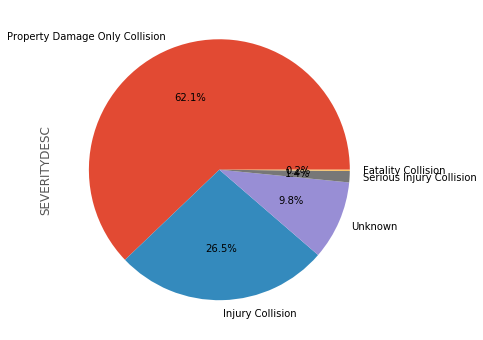

In [8]:
#Let us look at the type of accidents
# Most accidents resulted in property damage
df['SEVERITYDESC'].value_counts().plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%')

#### The above chart shows that we have about 10% of data without 'unknown' severity.  We can drop these records as it is not useful for predicting accident severity training 

In [9]:
#Let us remove the delete the record with 'unknown'target value
df.drop(df[df['SEVERITYDESC'] == "Unknown"].index , inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe684674780>],
      dtype=object)

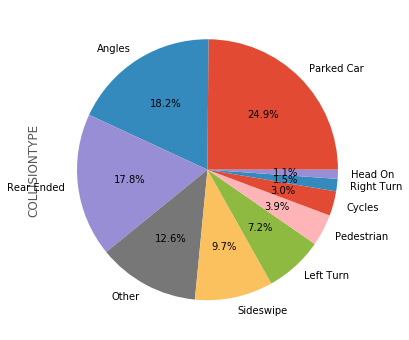

In [10]:
#Let us look at the collision types
#Most collisions happened with parked car

df['COLLISIONTYPE'].value_counts().plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68487d320>],
      dtype=object)

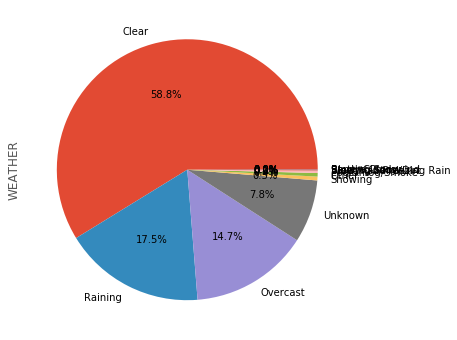

In [11]:
#Most collisions happened during clear weather conditions
#plt.figure(figsize=(10,10))
df['WEATHER'].value_counts().plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe684d813c8>],
      dtype=object)

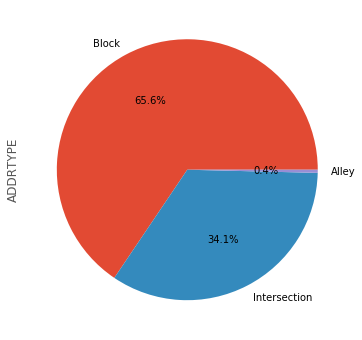

In [12]:
##location where most accidents take place
plt.figure(figsize=(11,6))
df['ADDRTYPE'].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6851452e8>],
      dtype=object)

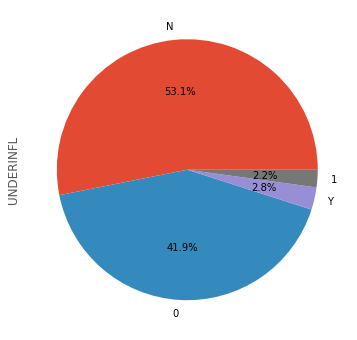

In [13]:
#Only 5% of accidents happened under the influence of alcohol

df['UNDERINFL'].value_counts().plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe675286d30>],
      dtype=object)

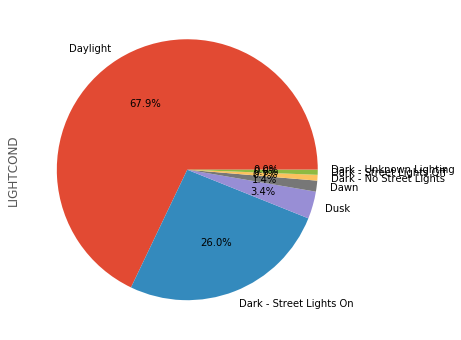

In [63]:
#Only 5% of accidents happened under the influence of alcohol

df['LIGHTCOND'].value_counts().plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6853e0390>],
      dtype=object)

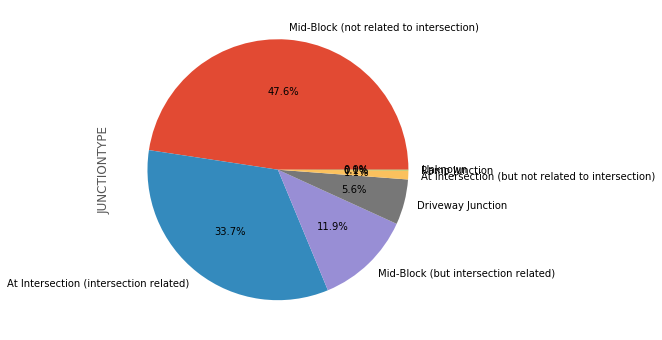

In [14]:
#Junction Types where most accidents take place
plt.figure(figsize=(11,6))
df['JUNCTIONTYPE'].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe685003320>],
      dtype=object)

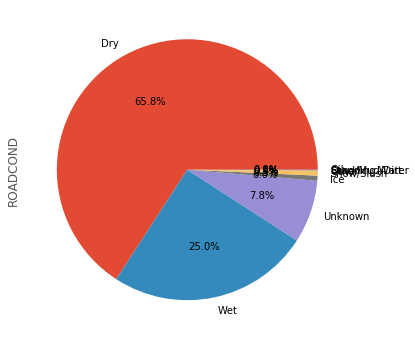

In [15]:
#Road condition where most accidents take place
plt.figure(figsize=(11,6))
df['ROADCOND'].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

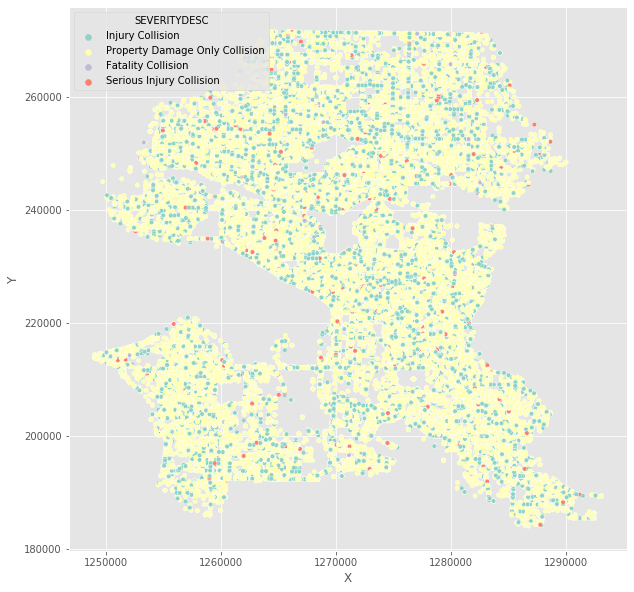

In [16]:
#Spacial distribution of accidents in SEATTLE
#Map of accidents, color coded by SEVERITY DESCRITION
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='X', y='Y', hue='SEVERITYDESC', s=20, palette="Set3")
plt.show()

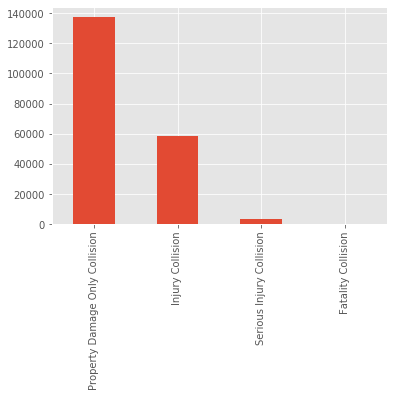

In [17]:
#let us look at the target class value imbalance
df['SEVERITYDESC'].value_counts().plot.bar()

### Let us clean and prepare data 


In [18]:
#Let us fix missing values and correct and normalize values
df.drop(df[df['ROADCOND'] == "Unknown"].index , inplace=True)
df.drop(df[df['JUNCTIONTYPE'] == "Unknown"].index, inplace=True)
df.drop(df[df['COLLISIONTYPE'] == "Other"].index, inplace=True)
df.drop(df[df['LIGHTCOND'] == "Unknown"].index,  inplace=True )
df.drop(df[df['LIGHTCOND'] == "Other"].index,  inplace=True )

In [19]:
#Series UNDERINFL has value entered in two different ways Y/N and 0/1 .
#Let us change Y to 1 and N to 0
#df['UNDERINFL'].replace({0: 'N', 1: 'Y', '0': 'N', '1': 'Y'}, inplace=True)
df['UNDERINFL'].replace({'N': 0, 'Y': 1}, inplace=True)
df['UNDERINFL'].value_counts()

0    84837
0    64113
1     3876
1     2954
Name: UNDERINFL, dtype: int64

In [20]:
df['INATTENTIONIND'].value_counts()

Y    26525
Name: INATTENTIONIND, dtype: int64

In [21]:
#fill INATTENTIONIND series with missing values , turn Y to 1 and blank to 0
df['INATTENTIONIND'].replace({ 'Y': 1}, inplace=True)
df['INATTENTIONIND'].fillna(0,inplace=True)
df['INATTENTIONIND'].value_counts()

0.0    134098
1.0     26525
Name: INATTENTIONIND, dtype: int64

In [22]:
#Analyze values in SPEEDING
df['SPEEDING'].value_counts()

Y    5833
Name: SPEEDING, dtype: int64

In [23]:
#Fill missing values and convert Y to 1 and N to 0
df['SPEEDING'].replace({ 'Y': 1}, inplace=True)
df['SPEEDING'].fillna(0,inplace=True)
df['SPEEDING'].value_counts()

0.0    154790
1.0      5833
Name: SPEEDING, dtype: int64

In [24]:
#Analyze values in PEDROWNOTGRNT
df['PEDROWNOTGRNT'].value_counts()

Y    5038
Name: PEDROWNOTGRNT, dtype: int64

In [25]:
#Fill missing values and convert Y to 1 and N to 0
df['PEDROWNOTGRNT'].replace({ 'Y': 1}, inplace=True)
df['PEDROWNOTGRNT'].fillna(0,inplace=True)
df['PEDROWNOTGRNT'].value_counts()

0.0    155585
1.0      5038
Name: PEDROWNOTGRNT, dtype: int64

In [26]:
#Analyze WEATHER
df['WEATHER'].value_counts()

Clear                       100101
Raining                      28513
Overcast                     24169
Unknown                       1285
Snowing                        718
Fog/Smog/Smoke                 443
Other                          256
Sleet/Hail/Freezing Rain        87
Blowing Sand/Dirt               50
Severe Crosswind                17
Partly Cloudy                    7
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [27]:
#drop values not useful
df.drop(df[df['WEATHER'] == "Unknown"].index ,inplace=True)
df.drop(df[df['WEATHER'] == "Other"].index,inplace=True)
df['WEATHER'].value_counts()

Clear                       100101
Raining                      28513
Overcast                     24169
Snowing                        718
Fog/Smog/Smoke                 443
Sleet/Hail/Freezing Rain        87
Blowing Sand/Dirt               50
Severe Crosswind                17
Partly Cloudy                    7
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [28]:
#let us analyze COLLISIONTYPE
df['COLLISIONTYPE'].value_counts()

Parked Car    36053
Angles        34807
Rear Ended    33397
Sideswipe     17970
Left Turn     13816
Pedestrian     7414
Cycles         5756
Right Turn     2887
Head On        2123
Name: COLLISIONTYPE, dtype: int64

In [29]:
#Let us drop all features that were created for Administrative purpose
#These features not a factor cause or causation of the incident
df.drop(['SDOTCOLNUM', 'INTKEY', 'STATUS', 'REPORTNO', 'INCKEY', 'OBJECTID','COLDETKEY'],  axis=1, inplace=True)

In [30]:
#As there is any explanation from the SDOT on EXCEPTRSNCODE let me drop that feature
df.drop(['EXCEPTRSNCODE'], axis=1, inplace=True)

#### Do we have the right variable format?  Date and time is not a date object

In [31]:
#We have two date fields one filed with date and another with date and time
#We can drop date filed with date only 
df.drop(['INCDATE'],  axis=1, inplace=True)

df['INCDTTM'].head(10)

0     11/20/2019 10:25:00 AM
1      11/18/2019 5:01:00 PM
2       2/20/2020 8:42:00 AM
3                   6/8/2004
8      11/21/2019 6:08:00 PM
9      3/28/2013 10:10:00 AM
10    12/27/2006 12:28:00 PM
11      2/21/2020 8:24:00 AM
12      6/21/2019 9:45:00 PM
13      2/23/2020 1:25:00 PM
Name: INCDTTM, dtype: object

In [32]:
# After analyzing the date and date time field, found many datetime filed without time value
# Also by analysing date and time of other incidents, 
#I found the top 10 frequency hours and use that randomly impute missing hour of day values
import re
import random
Top10Hours = [' 00:00:00 AM', ' 5:00:00 PM', ' 4:00:00 PM', ' 3:00:00 PM', ' 2:00:00 PM', ' 12:00:00 PM', ' 1:00:00 PM', ' 6:00:00 PM', ' 8:00:00 AM', ' 11:00:00 AM']
for i, r in enumerate(df['INCDTTM']):  
    # i will get index and r will gate current value of Date column
    # Check whether Date string has time part
    fa = re.findall('(\d+\/\d+\/\d{4}) (\d+:\d{2}:\d{2}) (AM|PM)',  r)
    if fa:
        #if date is two word format nothing to do
        pass
    else:
        fa = re.findall('(\d+\/\d+\/\d{4})',r)
        RandHour = random.choice(Top10Hours)
        NewDate = fa[0] +  RandHour
        #replace Date value with NewDate
        df.at[i, 'INCDTTM'] = NewDate


In [33]:
df['INCDTTM'].head(10)

0     11/20/2019 10:25:00 AM
1      11/18/2019 5:01:00 PM
2       2/20/2020 8:42:00 AM
3        6/8/2004 6:00:00 PM
8      11/21/2019 6:08:00 PM
9      3/28/2013 10:10:00 AM
10    12/27/2006 12:28:00 PM
11      2/21/2020 8:24:00 AM
12      6/21/2019 9:45:00 PM
13      2/23/2020 1:25:00 PM
Name: INCDTTM, dtype: object

#### Convert  INCDTTM to date time object

In [34]:

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [35]:
df['INCDTTM'].head(10)

0    2019-11-20 10:25:00
1    2019-11-18 17:01:00
2    2020-02-20 08:42:00
3    2004-06-08 18:00:00
8    2019-11-21 18:08:00
9    2013-03-28 10:10:00
10   2006-12-27 12:28:00
11   2020-02-21 08:24:00
12   2019-06-21 21:45:00
13   2020-02-23 13:25:00
Name: INCDTTM, dtype: datetime64[ns]

In [36]:
#Let us extract year, day of week, month, to create new feature and understand if there is any
#particular relations to accidents on particular day or time
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df['hourofday'] = df['INCDTTM'].dt.hour
df['month'] = df['INCDTTM'].dt.month
df['year'] = df['INCDTTM'].dt.year
df['dayofweek'].value_counts()

4    27909
3    25572
2    24879
1    24677
5    22783
0    22434
6    17838
Name: dayofweek, dtype: int64

In [37]:
df['month'].value_counts()

10    14933
6     14766
7     14684
5     14629
8     14318
11    13698
4     13643
1     13638
3     13537
9     13392
12    12570
2     12284
Name: month, dtype: int64

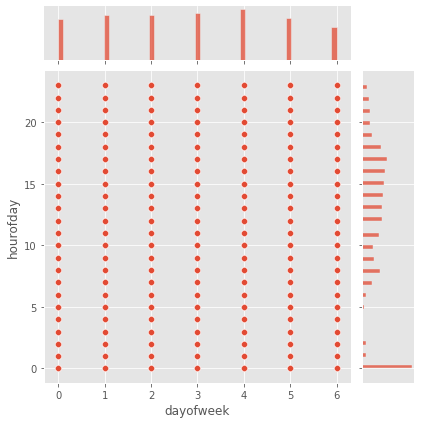

In [38]:
#plot the total incidents based on days
sns.jointplot(x='dayofweek', y='hourofday', data=df)

In [39]:
df['hourofday'].value_counts()

0     25225
17    12523
16    11982
15    11312
14    10785
13    10294
12    10192
18     9905
8      9027
11     8684
9      6050
10     5513
19     5306
7      4990
20     4445
21     4030
22     3748
23     2958
6      2285
2      2105
1      2085
5      1035
3       921
4       692
Name: hourofday, dtype: int64

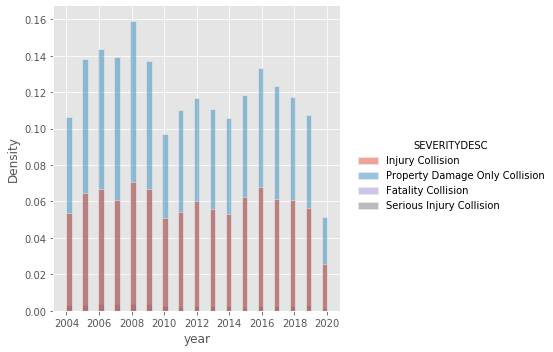

In [40]:
sns.displot(df, x='year', hue='SEVERITYDESC', stat="density")

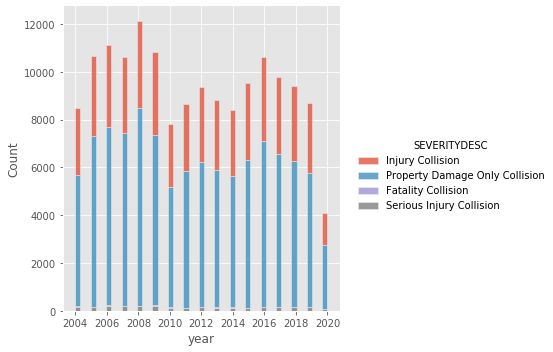

In [41]:
sns.displot(df, x='year', hue='SEVERITYDESC', multiple="stack")

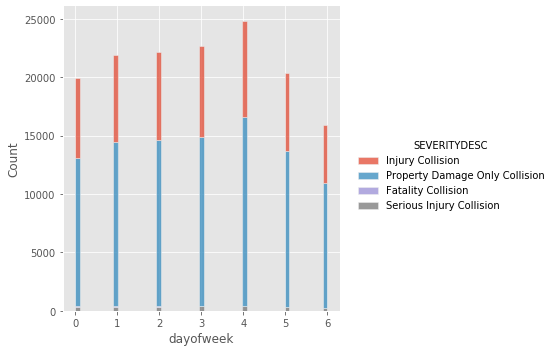

In [61]:
sns.displot(df, x='dayofweek', hue='SEVERITYDESC', multiple="stack")

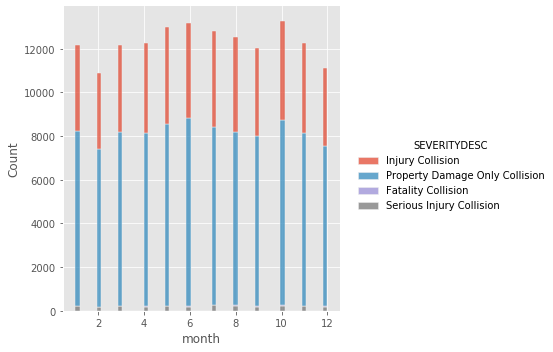

In [62]:
sns.displot(df, x='month', hue='SEVERITYDESC', multiple="stack")

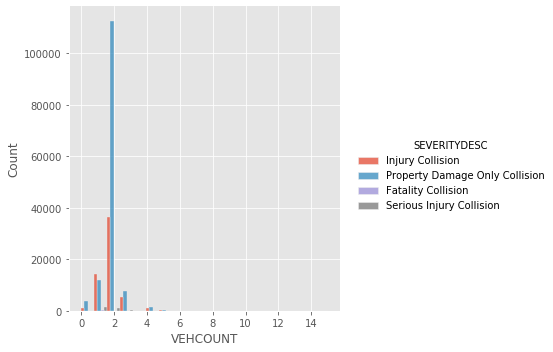

In [88]:
sns.displot(df, x='VEHCOUNT', hue='SEVERITYDESC', multiple="dodge")

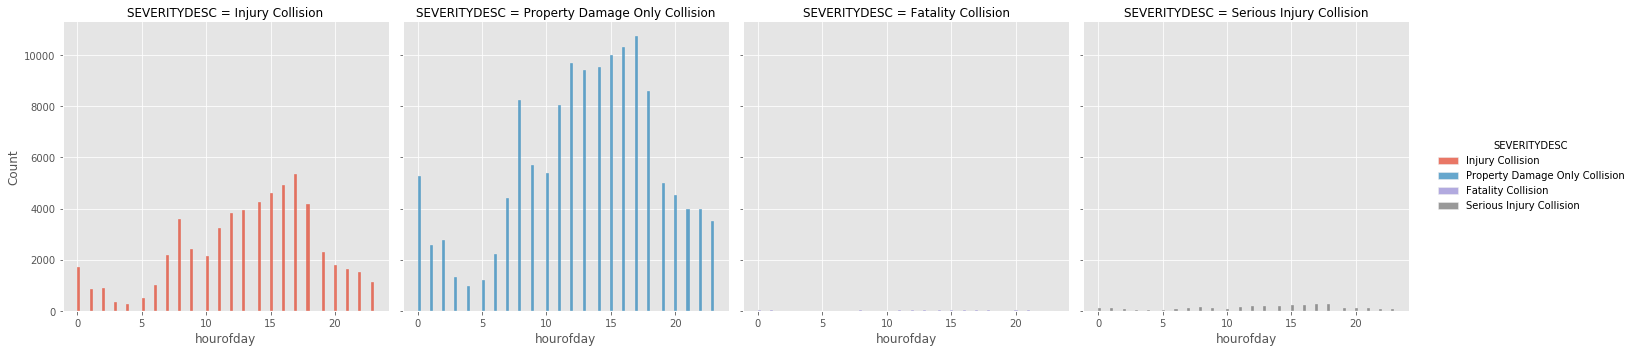

In [90]:
#What time of day most accidents happen?

sns.displot(data=df, x='hourofday', hue='SEVERITYDESC', col='SEVERITYDESC')

In [44]:
#It is time for us to drop all rows with null data
df.dropna(inplace=True)


In [45]:
#convert the Y/N (1/0) columns float to int
df = df.astype({'INATTENTIONIND': 'int', 'UNDERINFL': 'int', 'PEDROWNOTGRNT': 'int', 'SPEEDING': 'int' })


In [46]:
#Let us drop the duplilcate field SDOT_COLDESC
df.drop(['SDOT_COLDESC'], axis=1, inplace=True)


In [47]:
#let us analyze HITPARKEDCAR 
df['HITPARKEDCAR'].value_counts()

N    143217
Y      4585
Name: HITPARKEDCAR, dtype: int64

In [48]:
#Let us convert Y to 1 and N to 0
df['HITPARKEDCAR'].replace({ 'Y': 1, 'N': 0}, inplace=True)

In [49]:
df['HITPARKEDCAR'].value_counts()

0    143217
1      4585
Name: HITPARKEDCAR, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147802 entries, 0 to 221265
Data columns (total 31 columns):
SEVERITYDESC       147802 non-null object
X                  147802 non-null float64
Y                  147802 non-null float64
ADDRTYPE           147802 non-null object
LOCATION           147802 non-null object
COLLISIONTYPE      147802 non-null object
PERSONCOUNT        147802 non-null float64
PEDCOUNT           147802 non-null float64
PEDCYLCOUNT        147802 non-null float64
VEHCOUNT           147802 non-null float64
INJURIES           147802 non-null float64
SERIOUSINJURIES    147802 non-null float64
FATALITIES         147802 non-null float64
INCDTTM            147802 non-null datetime64[ns]
JUNCTIONTYPE       147802 non-null object
SDOT_COLCODE       147802 non-null float64
INATTENTIONIND     147802 non-null int64
UNDERINFL          147802 non-null int64
WEATHER            147802 non-null object
ROADCOND           147802 non-null object
LIGHTCOND          147802 non-nul

In [51]:
# Is a particular location more accident prone? get value from LOCATION DATA
loc_df = df['LOCATION'].value_counts()
loc_top50 = loc_df.head(50)
loc_top50_df = loc_top50.to_frame()
loc_top50_df.reset_index(inplace=True)
loc_top50_df.rename(columns = {'LOCATION': 'Count', 'index': 'LOC'}, inplace=True)
loc_top50_df.head()

,LOC,Count
0,6TH AVE AND JAMES ST,243
1,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,195
2,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,186
3,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,182
4,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,179


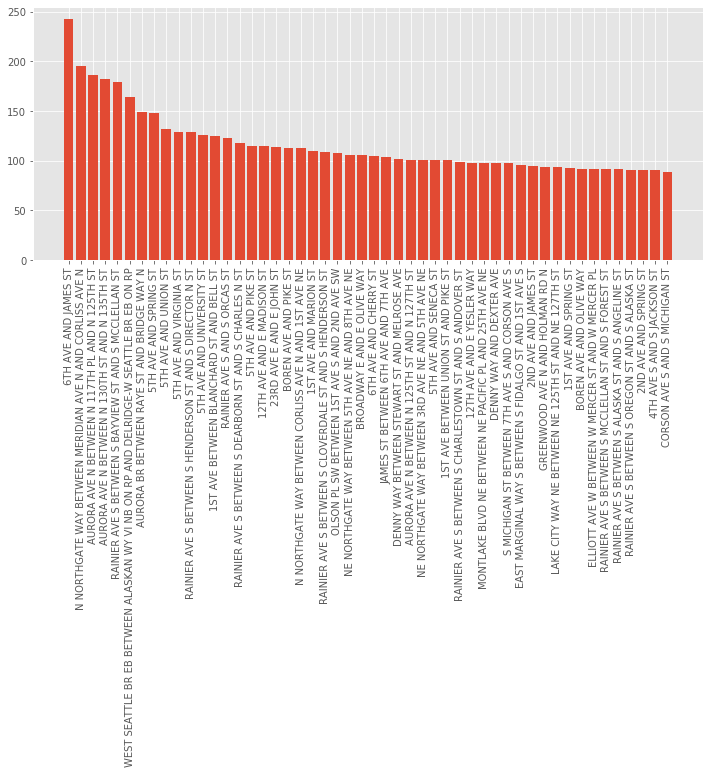

In [52]:
#Let us plot the top50 accident locations
plt.figure(figsize=(12,44))
y_pos = np.arange(len(loc_top50_df['LOC']))

plt.bar(y_pos, loc_top50_df['Count'])
plt.xticks(y_pos, loc_top50_df['LOC'], rotation=90)
plt.subplots_adjust(bottom=0.8)

In [53]:
#We need to handle date specially as month and hour of day are cyclic.  It need to be transformed to
#cyclic value to get better performance out of date
df['hr_sin'] = np.sin(df.hourofday*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hourofday*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [67]:
#As we have now created cyclic features of month and hour, we can drop original month and year
#from features
df.drop(['month', 'hourofday'], axis=1, inplace=True)


### Feature Selection
#### Our target variable is of categorical and we have a mix of Numeric and Categorical Inputs
##### We will use the following filtering methods for feature selection
##### ANOVA for Numeric linear inputs
##### Kendall's rank coefficient for Numeric non-linear inputs
##### Chi-Squared (or Mutual Information) for categorical inputs

In [68]:
#Let us look at the remaining features after first round of data cleaning and preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147802 entries, 0 to 221265
Data columns (total 33 columns):
SEVERITYDESC       147802 non-null object
X                  147802 non-null float64
Y                  147802 non-null float64
ADDRTYPE           147802 non-null object
LOCATION           147802 non-null object
COLLISIONTYPE      147802 non-null object
PERSONCOUNT        147802 non-null float64
PEDCOUNT           147802 non-null float64
PEDCYLCOUNT        147802 non-null float64
VEHCOUNT           147802 non-null float64
INJURIES           147802 non-null float64
SERIOUSINJURIES    147802 non-null float64
FATALITIES         147802 non-null float64
INCDTTM            147802 non-null datetime64[ns]
JUNCTIONTYPE       147802 non-null object
SDOT_COLCODE       147802 non-null float64
INATTENTIONIND     147802 non-null int64
UNDERINFL          147802 non-null int64
WEATHER            147802 non-null object
ROADCOND           147802 non-null object
LIGHTCOND          147802 non-nul

In [69]:
#There are few more columns that we can drop due to the following reasons
# INCDTTM - as we have already created a superset of new features (dayofweek, year, hour and month out of it
# Location is the text data of X,Y coordinates
df.drop(['INCDTTM', 'LOCATION'], axis=1, inplace=True)

<BarContainer object of 10 artists>

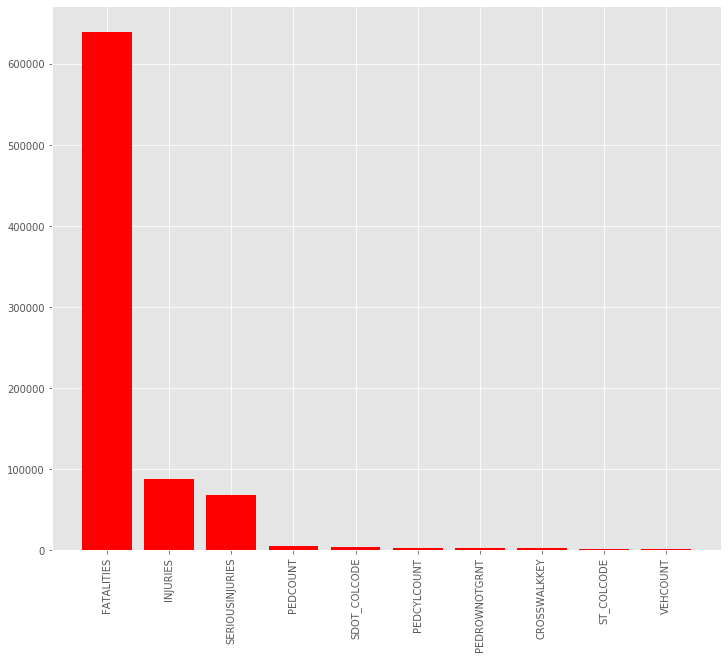

In [89]:


#Let us split target variable and Input variables according to their data type

y = df['SEVERITYDESC'].values
#Numerical features - first get all numerical features into Feature as they don't need to be encoded
NI = df[['X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 
          'FATALITIES', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'SEGLANEKEY',
         'CROSSWALKKEY' , 'HITPARKEDCAR', 'ST_COLCODE', 'dayofweek','year', 'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos' ]]


#define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
#apply feature selection
fs.fit_transform(NI, y)
#Get columns to keep and create new dataframe with those only
NI_cols = fs.get_support(indices=True)
NI_selected = NI.iloc[:,NI_cols]



indices = np.argsort(fs.scores_)[::-1] # column indexes according to score sorted

NI_Features = []
for i in range(10):
   NI_Features.append(NI.columns[indices[i]])
    
#Plot Top 10 Numeric features selected
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
plt.bar(NI_Features, fs.scores_[indices[range(10)]], color='r', align='center')




In [79]:
NI_selected.head()

,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,PEDROWNOTGRNT,CROSSWALKKEY,ST_COLCODE
0,1.0,0.0,1.0,1.0,0.0,0.0,24.0,1,0.0,2
1,0.0,0.0,2.0,2.0,0.0,0.0,11.0,0,0.0,10
2,0.0,0.0,3.0,0.0,0.0,0.0,14.0,0,0.0,11
3,0.0,0.0,2.0,0.0,0.0,0.0,11.0,0,0.0,28
8,1.0,0.0,1.0,1.0,0.0,0.0,24.0,1,521184.0,0


In [80]:
#shape of slected features
NI_selected.shape

(147802, 10)

### Categorical Feature Selection 
### Chi_square 


In [98]:
from sklearn.feature_selection import chi2

#Categorical features CI - Categorical Inputs
CatList = ['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

#Encode and contenate categorical inputs to Features frame
CI_ohe = df['X'] #create dummy dataFrame then drop X
for item in CatList:
    CI_ohe = pd.concat([CI_ohe, pd.get_dummies(df[item])], axis=1)

CI_ohe.drop(['X'], axis=1, inplace=True)  

fs = SelectKBest(score_func=chi2, k='all')
fs.fit_transform(CI_ohe, y)

#what are the scores for features
for i in range(len(fs.scores_)):
    print('Feature %d: %s: %f' % (i, CI_ohe.columns[i], fs.scores_[i]))


Feature 0: Block: 2171.505057
Feature 1: Intersection: 3226.379038
Feature 2: Angles: 538.267139
Feature 3: Cycles: 7485.204756
Feature 4: Head On: 268.372183
Feature 5: Left Turn: 217.891963
Feature 6: Parked Car: 10337.235636
Feature 7: Pedestrian: 13017.240829
Feature 8: Rear Ended: 1542.854209
Feature 9: Right Turn: 224.482049
Feature 10: Sideswipe: 3355.696075
Feature 11: At Intersection (but not related to intersection): 3.002649
Feature 12: At Intersection (intersection related): 3312.125511
Feature 13: Driveway Junction: 8.629904
Feature 14: Mid-Block (but intersection related): 112.572272
Feature 15: Mid-Block (not related to intersection): 2956.614423
Feature 16: Ramp Junction: 0.281486
Feature 17: Blowing Sand/Dirt: 1.036267
Feature 18: Clear: 3.692209
Feature 19: Fog/Smog/Smoke: 7.924677
Feature 20: Overcast: 5.737416
Feature 21: Partly Cloudy: 1.820709
Feature 22: Raining: 31.040929
Feature 23: Severe Crosswind: 39.550899
Feature 24: Sleet/Hail/Freezing Rain: 1.563449
Feat

In [99]:
#From the chi2 evaluation, it seems weather and lighing seems to be least impacting 
#for removing encoded features, it should be removed as a set.  Let us find out the set elements
#of Weather and Lighting
df['WEATHER'].value_counts()
    

Clear                       96017
Raining                     27380
Overcast                    23203
Snowing                       631
Fog/Smog/Smoke                425
Sleet/Hail/Freezing Rain       83
Blowing Sand/Dirt              40
Severe Crosswind               16
Partly Cloudy                   7
Name: WEATHER, dtype: int64

In [101]:
df['ROADCOND'].value_counts()

Dry               107351
Wet                38961
Ice                  694
Snow/Slush           635
Other                 59
Standing Water        51
Sand/Mud/Dirt         30
Oil                   21
Name: ROADCOND, dtype: int64

In [100]:
df['LIGHTCOND'].value_counts()

Daylight                    100361
Dark - Street Lights On      38456
Dusk                          5007
Dawn                          2000
Dark - No Street Lights       1055
Dark - Street Lights Off       911
Dark - Unknown Lighting         12
Name: LIGHTCOND, dtype: int64

In [107]:
# We will go with the full categorical feature now 
# Let us concatenate all seltected numerical and categorical features.

Feature = pd.concat([NI_selected, CI_ohe], axis=1)

In [108]:
Feature.shape

(147802, 51)

### Modeling with Top10 Numerical Features and all Categorical Features

### K Nearest Neighbour (KNN)

In [109]:
#from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(Feature, y, test_size = 0.3, random_state = 4)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    Neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = Neigh.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
    std_acc[k-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    
mean_acc

array([0.97821429, 0.97713177, 0.97744751, 0.97634244, 0.97532757,
       0.974651  , 0.9728017 , 0.97259872, 0.97117792])

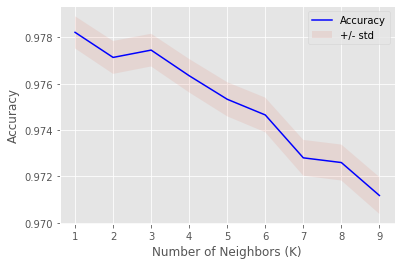

In [110]:
plt.plot(range(1,Ks), mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [111]:
k = 1
Neigh = KNeighborsClassifier(n_neighbors=k)
Neigh.fit(X_train, y_train)
yhat = Neigh.predict(X_test)
print(yhat[0:5])
print("Test Set Accuracy: ", accuracy_score(y_test, yhat))

['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
Test Set Accuracy:  0.9782142937687468


In [114]:
# use the model to predict the labels of the test data
#yhat is predicated data
#y_test is expected data
print(classification_report(y_test, yhat))

                                precision    recall  f1-score   support

            Fatality Collision       0.51      0.26      0.35        68
              Injury Collision       0.97      0.97      0.97     14819
Property Damage Only Collision       0.99      0.99      0.99     28706
      Serious Injury Collision       0.84      0.63      0.72       748

                      accuracy                           0.98     44341
                     macro avg       0.83      0.71      0.76     44341
                  weighted avg       0.98      0.98      0.98     44341



### SVM Model

In [121]:
from sklearn import svm
LoanSVM = svm.SVC(kernel='rbf')
LoanSVM.fit(X_train, y_train)
yhat2 = LoanSVM.predict(X_test) 
print("Test Set Accuracy: ", accuracy_score(y_test, yhat2))

Test Set Accuracy:  0.6671026814911707


In [122]:
print(classification_report(y_test, yhat2))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

            Fatality Collision       0.00      0.00      0.00        68
              Injury Collision       0.82      0.07      0.12     14819
Property Damage Only Collision       0.66      1.00      0.80     28706
      Serious Injury Collision       0.00      0.00      0.00       748

                      accuracy                           0.67     44341
                     macro avg       0.37      0.27      0.23     44341
                  weighted avg       0.70      0.67      0.56     44341



### Logistic Regression Model

In [123]:
LR = LogisticRegression(C=0.1, solver='liblinear')
LR.fit(X_train, y_train)
yhat3 = LR.predict(X_test)
print(yhat3[0:5])
print("Test Set Accuracy: ", accuracy_score(y_test, yhat3))

['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
Test Set Accuracy:  0.9801763604790149


In [124]:
print(classification_report(y_test, yhat3))

                                precision    recall  f1-score   support

            Fatality Collision       1.00      0.49      0.65        68
              Injury Collision       0.95      0.99      0.97     14819
Property Damage Only Collision       1.00      1.00      1.00     28706
      Serious Injury Collision       1.00      0.01      0.03       748

                      accuracy                           0.98     44341
                     macro avg       0.99      0.62      0.66     44341
                  weighted avg       0.98      0.98      0.97     44341



## undersampled version

In [126]:
#original count
pd.Series(y).value_counts()

Property Damage Only Collision    95699
Injury Collision                  49427
Serious Injury Collision           2436
Fatality Collision                  240
dtype: int64

In [127]:
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


In [128]:
# Undersamples variation
# ----------------------

# Generate variation 
rus = RandomUnderSampler()
Feature_under, y_under = rus.fit_resample(Feature, y)

# Print class frequencies for variation
pd.Series(y_under).value_counts()


Fatality Collision                240
Serious Injury Collision          240
Injury Collision                  240
Property Damage Only Collision    240
dtype: int64

### KNearest Neighbor (KNN) using undersample data


In [129]:
#from sklearn import metrics
X_utrain, X_utest, y_utrain, y_utest = train_test_split(Feature_under, y_under, test_size = 0.3, random_state = 4)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    Neigh = KNeighborsClassifier(n_neighbors=k).fit(X_utrain, y_utrain)
    y_uhat = Neigh.predict(X_utest)
    mean_acc[k-1] = accuracy_score(y_utest, y_uhat)
    std_acc[k-1] = np.std(yhat==y_utest)/np.sqrt(y_uhat.shape[0])

    
mean_acc

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 

array([0.72569444, 0.64236111, 0.69097222, 0.65625   , 0.66666667,
       0.69444444, 0.69791667, 0.69444444, 0.71527778])

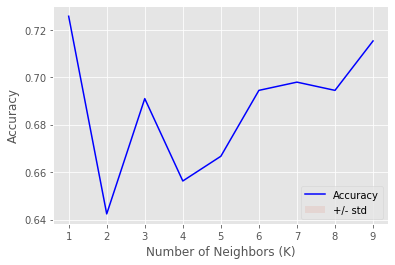

In [130]:
plt.plot(range(1,Ks), mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

### SVM undersampled

In [133]:
LoanSVM = svm.SVC(kernel='rbf')
LoanSVM.fit(X_utrain, y_utrain)
y_uhat2 = LoanSVM.predict(X_utest) 
print("Test Set Accuracy: ", accuracy_score(y_utest, y_uhat2))

Test Set Accuracy:  0.2986111111111111


In [134]:
print(classification_report(y_utest, y_uhat2))

                                precision    recall  f1-score   support

            Fatality Collision       0.54      0.21      0.31        70
              Injury Collision       0.00      0.00      0.00        72
Property Damage Only Collision       0.27      1.00      0.43        71
      Serious Injury Collision       0.00      0.00      0.00        75

                      accuracy                           0.30       288
                     macro avg       0.20      0.30      0.18       288
                  weighted avg       0.20      0.30      0.18       288



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression undersampled

In [135]:
LR = LogisticRegression(C=0.1, solver='liblinear')
LR.fit(X_utrain, y_utrain)
y_uhat3 = LR.predict(X_utest)
print(y_uhat3[0:5])
print("Test Set Accuracy: ", accuracy_score(y_utest, y_uhat3))

['Property Damage Only Collision' 'Serious Injury Collision'
 'Serious Injury Collision' 'Fatality Collision'
 'Property Damage Only Collision']
Test Set Accuracy:  0.7916666666666666


In [136]:
print(classification_report(y_utest, y_uhat3))

                                precision    recall  f1-score   support

            Fatality Collision       0.96      0.96      0.96        70
              Injury Collision       0.64      0.50      0.56        72
Property Damage Only Collision       0.69      0.72      0.70        71
      Serious Injury Collision       0.84      0.99      0.91        75

                      accuracy                           0.79       288
                     macro avg       0.78      0.79      0.78       288
                  weighted avg       0.78      0.79      0.78       288



## Oversampled version

### K Nearest Neighbor KNN

In [137]:
# Oversamples variation
# ----------------------

# Generate variation 
ros = RandomOverSampler()
Feature_over, y_over = ros.fit_resample(Feature, y)

# Print class frequencies for variation
pd.Series(y_over).value_counts()

Property Damage Only Collision    95699
Serious Injury Collision          95699
Injury Collision                  95699
Fatality Collision                95699
dtype: int64

In [138]:
#from sklearn import metrics
X_otrain, X_otest, y_otrain, y_otest = train_test_split(Feature_over, y_over, test_size = 0.3, random_state = 4)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    Neigh = KNeighborsClassifier(n_neighbors=k).fit(X_otrain, y_otrain)
    y_ohat = Neigh.predict(X_otest)
    mean_acc[k-1] = accuracy_score(y_otest, y_ohat)
    std_acc[k-1] = np.std(y_ohat==y_otest)/np.sqrt(y_ohat.shape[0])

    
mean_acc

array([0.9953413 , 0.9944444 , 0.9925635 , 0.99234581, 0.99063907,
       0.99030817, 0.98883655, 0.98887138, 0.98704273])

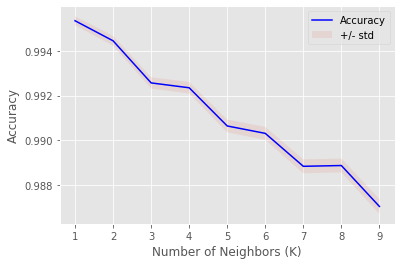

In [139]:
plt.plot(range(1,Ks), mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [140]:
k = 1
Neigh = KNeighborsClassifier(n_neighbors=k)
Neigh.fit(X_otrain, y_otrain)
y_ohat = Neigh.predict(X_otest)
print(yhat[0:5])
print("Test Set Accuracy: ", accuracy_score(y_otest, y_ohat))

['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
Test Set Accuracy:  0.9953413039124339


In [141]:
print(classification_report(y_otest, y_ohat))

                                precision    recall  f1-score   support

            Fatality Collision       1.00      1.00      1.00     28595
              Injury Collision       0.99      0.99      0.99     28750
Property Damage Only Collision       0.99      0.99      0.99     28778
      Serious Injury Collision       1.00      1.00      1.00     28716

                      accuracy                           1.00    114839
                     macro avg       1.00      1.00      1.00    114839
                  weighted avg       1.00      1.00      1.00    114839



### SVM oversampled

In [144]:
LoanSVM = svm.SVC(kernel='rbf')
LoanSVM.fit(X_otrain, y_otrain)
y_ohat2 = LoanSVM.predict(X_otest) 
print("Test Set Accuracy: ", accuracy_score(y_otest, y_ohat2))

Test Set Accuracy:  0.3039820966744747


In [145]:
print(classification_report(y_otest, y_ohat2))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

            Fatality Collision       0.52      0.22      0.31     28595
              Injury Collision       0.00      0.00      0.00     28750
Property Damage Only Collision       0.28      1.00      0.44     28778
      Serious Injury Collision       0.00      0.00      0.00     28716

                      accuracy                           0.30    114839
                     macro avg       0.20      0.30      0.19    114839
                  weighted avg       0.20      0.30      0.19    114839



In [146]:
X_otrain.shape

(267957, 51)

### Logistic Regression 

In [147]:
LR = LogisticRegression(C=0.1, solver='liblinear')
LR.fit(X_otrain, y_otrain)
y_ohat3 = LR.predict(X_otest)
print(y_ohat3[0:5])
print("Test Set Accuracy: ", accuracy_score(y_otest, y_ohat3))

['Fatality Collision' 'Fatality Collision'
 'Property Damage Only Collision' 'Injury Collision' 'Injury Collision']
Test Set Accuracy:  0.7642786858123112


In [148]:
print(classification_report(y_otest, y_ohat3))

                                precision    recall  f1-score   support

            Fatality Collision       1.00      0.99      1.00     28595
              Injury Collision       0.54      0.65      0.59     28750
Property Damage Only Collision       0.65      0.46      0.54     28778
      Serious Injury Collision       0.87      0.97      0.91     28716

                      accuracy                           0.76    114839
                     macro avg       0.76      0.76      0.76    114839
                  weighted avg       0.76      0.76      0.76    114839

